# Cobb-Douglas Simple Consumer Model Solver and Plotter

## Modules

In [3]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## Variables and Formulas

In [4]:
x1,x2=symbols("x_1 x_2") #Goods
p1,p2=symbols("p_1 p_2") #Prices
R=symbols("R")           #Income
alpha=symbols("alpha")   #Power

In [5]:
U=x1**alpha*x2**(1-alpha) # Cobb-Douglas Utility Function
U

x_1**alpha*x_2**(1 - alpha)

In [6]:
MRS=simplify(diff(U,x1)/diff(U,x2)) #Marginal Rate of Substitution
MRS

-alpha*x_2/(x_1*(alpha - 1))

In [36]:
budget=p1*x1+p2*x2-R
BO=(R-p1*x1)/p2 #Budget Constraint
BO

(R - p_1*x_1)/p_2

In [12]:
Eq(MRS,p1/p2) #First Order Condition

Eq(-alpha*x_2/(x_1*(alpha - 1)), p_1/p_2)

## Solver

**First Order Condition:** $MRS=p_1/p_2$

**Budget Constraint:** $R=p_1x_1 + p_2x_2$

**Optimums:** $(x_1^{*},x_2^{*})$

In [42]:
def CobbDouglas_solver(R_check,p1_check,p2_check,alpha_check):
#======================================================================
    U_check=(MRS-p1/p2).subs(p1,p1_check).subs(p2,p2_check).subs(alpha,alpha_check)
    x1_MRS=solve(U_check,x1)[0]
    x2_MRS=solve(U_check,x2)[0]
#======================================================================    
    budget_check=budget.subs(p1,p1_check).subs(p2,p2_check).subs(R,R_check)
    x1_opt=solve(budget_check.subs(x2,x2_MRS),x1)[0]
    x2_opt=solve(budget_check.subs(x1,x1_MRS),x2)[0]

    return [x1_opt,x2_opt]

### Examples

In [43]:
CobbDouglas_solver(16,3,1,0.5)

[2.66666666666667, 8.00000000000000]

In [44]:
CobbDouglas_solver(10,3,1,0.5)

[1.66666666666667, 5.00000000000000]

In [45]:
CobbDouglas_solver(10,3,1,0.3)

[1.00000000000000, 7.00000000000000]

In [46]:
CobbDouglas_solver(16,1,1,0.1)

[1.60000000000000, 14.4000000000000]

## Plotter

In [77]:
def CobbDouglas_plotter(R_check,p1_check,p2_check,alpha_check,n_tochek=50):
#======================================================================  
    x1_opt,x2_opt=CobbDouglas_solver(R_check,p1_check,p2_check,alpha_check)
    U_check=U.subs(p1,p1_check).subs(p2,p2_check).subs(alpha,alpha_check)
    U_opt_value=U_check.subs(x1,x1_opt).subs(x2,x2_opt)
#======================================================================     
    x2_opt_U_value_x1=solve(U_check-round(U_opt_value,4),x2)[0]
#====================================================================== 
    lambda_x2_U_opt_value_x1=lambdify(x1,x2_opt_U_value_x1)
    
    x1_u_x2=np.arange(x1_opt/8,2*x1_opt,
                      2.5*x1_opt/(n_tochek))
    
    x2_u_x1=lambda_x2_U_opt_value_x1(x1_u_x2)
#======================================================================
#=======PLOTTING=======================================================
    fig, ax = plt.subplots() 

    ax.set_title(U_check.subs(alpha,alpha_check), fontsize=16)
    ax.set_xlabel(r'$x_1$', fontsize=14) 
    ax.set_ylabel(r'$x_2$', fontsize=14)
#======GRID============================================================    
    ax.grid(which='major', linewidth=1.2) 
    ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
#======U plot==========================================================
    ax.plot(x1_u_x2, x2_u_x1, label='U')
#======BO plot=========================================================    
    ax.plot([0,R_check/p1_check],[R_check/p2_check,0], label='BO')
#======(X1,X2) OPTS====================================================
    ax.scatter(x1_opt,x2_opt,c='black',s=50,marker="o",
               label=f'({round(x1_opt,1)},{round(x2_opt,1)}')
    ax.plot([x1_opt,x1_opt], [0,x2_opt],linestyle='--', color='black')
    ax.plot([0,x1_opt], [x2_opt,x2_opt],linestyle='--', color='black')
#======Limits on axis==================================================
    ax.set_xlim(0,2*float(x1_opt))
    ax.set_ylim(0,2*float(x2_opt))
    
    ax.legend()
    plt.show()

### Examples

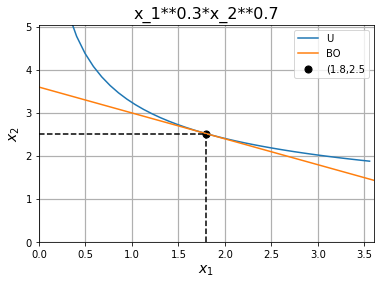

In [78]:
CobbDouglas_plotter(18,3,5,0.3)

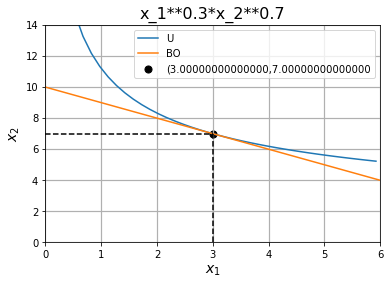

In [79]:
CobbDouglas_plotter(10,1,1,0.3)